In [1]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

## Constructing a Ladder Network
This code constructs the default architecture of the ladder network. This is a network that returns a delayed version of the input in each of its outputs.

In [2]:
import numpy as np
import control as ctrl

def ladder_network(n_inputs, n_outputs, max_delay):

    num_mat = []
    den_mat = []

    for row in range(n_inputs):
        num_row = []
        den_row = []
        for col in range(n_outputs):
            if row == col:
                den = np.array([1, 0])
                for _ in range(1, col*int(max_delay/(n_outputs - 1))):
                    den = np.convolve(den, np.array([1, 0]))
                num_row.append(np.array([1]))
                den_row.append(den)
            else:
                num_row.append(np.array([0]))
                den_row.append(np.array([1]))

        num_mat.append(num_row)
        den_mat.append(den_row)

    G_tf_mat = ctrl.TransferFunction(num_mat, den_mat, True)

    ss_G = ctrl.tf2ss(G_tf_mat)

    A, B, C, D = np.asarray(ss_G.A), np.asarray(ss_G.B), np.asarray(ss_G.C), np.asarray(ss_G.D)
    
    return A, B, C, D

In the cell below, we create a `ladder_network` with `n_inputs = 3` and `n_outputs = 3`. The maximum delay is set to `max_delay = 3`. The function returns a state-space realization of such system. 

In [7]:
A, B, C, D = ladder_network(n_inputs = 5, n_outputs = 5, max_delay = 100)
ss_ladder = ctrl.StateSpace(A, B, C, D, True)

Below, we validate the output of the delay system. We input a set of signals $\mathbf{U}$ and get a delayed version by 
$1$, $50$ and $100$ samples, respectively

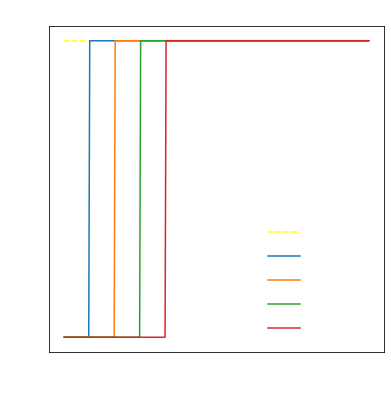

In [35]:
T = np.arange(0, 300, 1)
U = np.ones([5, len(T)])

#U[-1,:] = np.sin(2*np.pi*(1/200)*T) + np.cos(4*np.pi*(1/200)*T) 

_, s, _ = ctrl.forced_response(ss_ladder, T, U)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))

axes.plot(T, U[out, :], label = f"Input", color = 'yellow', linestyle = '--')

for out in range(1, s.shape[0]):
    axes.plot(T, s[out, :], label = f"Output {out}")

font_plot = 'Times'
axes.legend(prop = {'size' : 16, 'family' : font_plot}, frameon = False)

axes.set_xlabel("Time (s)", fontname = font_plot, color = "white", fontsize = 15)
axes.set_ylabel("Amplitude", fontname = font_plot, color = "white", fontsize = 15)
axes.set_title("Ladder Network Outputs", fontname = font_plot, fontsize = 20, color = "white")
            
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_fontname(font_plot)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_fontname(font_plot)
    
leg = axes.get_legend()
for text in leg.get_texts():
    text.set_color("white")
    
axes.tick_params(color = "white", labelcolor = "white")

fig.savefig("Fig_Ladder_Network.png", dpi = 300, transparent = True)